In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [4]:
# Load Data sets
file_path = '/content/churn-bigml-20.csv'
data = pd.read_csv(file_path)

file_path1 = '/content/churn-bigml-80.csv'
data_testing = pd.read_csv(file_path)


Display DATA TRAINING

In [5]:
print(data.head())

  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95   

AFFICHER DATA TESTING

In [6]:
print(data_testing.head())

  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95   

In [7]:
print(data.describe())

       Account length   Area code  Number vmail messages  Total day minutes  \
count      667.000000  667.000000             667.000000         667.000000   
mean       102.841079  436.157421               8.407796         180.948126   
std         40.819480   41.783305              13.994480          55.508628   
min          1.000000  408.000000               0.000000          25.900000   
25%         76.000000  408.000000               0.000000         146.250000   
50%        102.000000  415.000000               0.000000         178.300000   
75%        128.000000  415.000000              20.000000         220.700000   
max        232.000000  510.000000              51.000000         334.300000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count       667.000000        667.000000         667.000000       667.000000   
mean        100.937031         30.761769         203.355322       100.476762   
std          20.396790          9.436463        

In [8]:
print(data_testing.describe())

       Account length   Area code  Number vmail messages  Total day minutes  \
count      667.000000  667.000000             667.000000         667.000000   
mean       102.841079  436.157421               8.407796         180.948126   
std         40.819480   41.783305              13.994480          55.508628   
min          1.000000  408.000000               0.000000          25.900000   
25%         76.000000  408.000000               0.000000         146.250000   
50%        102.000000  415.000000               0.000000         178.300000   
75%        128.000000  415.000000              20.000000         220.700000   
max        232.000000  510.000000              51.000000         334.300000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count       667.000000        667.000000         667.000000       667.000000   
mean        100.937031         30.761769         203.355322       100.476762   
std          20.396790          9.436463        

In [9]:
colonnes = data.columns.tolist()
print(colonnes)

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [10]:
df = pd.DataFrame(data)
features = df.drop('Churn', axis=1)  # Données de caractéristiques
target = df['Churn']
print("Features (X):")
print(features.head())
print("\nTarget (y):")
print(target.head())

Features (X):
  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1       

In [11]:
# Merge the two datasets
merged_data = pd.concat([data, data_testing], ignore_index=True)

df = pd.DataFrame(merged_data)
features = df.drop('Churn', axis=1)  # Données de caractéristiques
target = df['Churn']
print("Features (X):")
print(features.head())
print("\nTarget (y):")
print(target.head())

Features (X):
  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1       

CONVERTION DATA TRAINING

In [12]:

original = data.copy()


binary_columns = original.columns[original.apply(lambda col: col.dropna().isin([0, 1]).all())]


categorical_columns = original.select_dtypes(include=['object', 'category']).columns
print("Colonnes catégoriques :\n")
display(categorical_columns)


integer_columns = original.select_dtypes(include=['int', 'float']).columns
print("Colonnes numériques :\n")
display(integer_columns)

# Combiner les trois ensembles de colonnes
combined_columns = binary_columns.union(categorical_columns).union(integer_columns)

# Exclure la colonne 'Churn' si elle est présente
if 'Churn' in combined_columns:
    combined_columns = combined_columns.drop('Churn')

# Extraire les colonnes sélectionnées
combined_data = original[combined_columns]

# Afficher les colonnes combinées sans 'Churn'
print("Colonnes combinées sans 'Churn' :\n")
display(combined_data)

Colonnes catégoriques :



Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

Colonnes numériques :



Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

Colonnes combinées sans 'Churn' :



,Account length,Area code,Customer service calls,International plan,Number vmail messages,State,Total day calls,Total day charge,Total day minutes,Total eve calls,Total eve charge,Total eve minutes,Total intl calls,Total intl charge,Total intl minutes,Total night calls,Total night charge,Total night minutes,Voice mail plan
0,117,408,1,No,0,LA,97,31.37,184.5,80,29.89,351.6,4,2.35,8.7,90,9.71,215.8,No
1,65,415,4,No,0,IN,137,21.95,129.1,83,19.42,228.5,6,3.43,12.7,111,9.40,208.8,No
2,161,415,4,No,0,NY,67,56.59,332.9,97,27.01,317.8,9,1.46,5.4,128,7.23,160.6,No
3,111,415,2,No,0,SC,103,18.77,110.4,102,11.67,137.3,6,2.08,7.7,105,8.53,189.6,No
4,49,510,1,No,0,HI,117,20.28,119.3,109,18.28,215.1,1,3.00,11.1,90,8.04,178.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,2,No,26,WI,88,23.31,137.1,125,13.23,155.7,7,3.11,11.5,94,11.14,247.6,Yes
663,106,408,1,No,29,AL,131,14.21,83.6,131,17.33,203.9,3,2.19,8.1,73,10.33,229.5,Yes
664,60,415,3,No,0,VT,118,32.96,193.9,110,7.23,85.0,8,3.56,13.2,134,9.45,210.1,No
665,159,415,1,No,0,WV,114,28.87,169.8,105,16.80,197.7,4,3.13,11.6,82,8.72,193.7,No


In [13]:
from sklearn.preprocessing import LabelEncoder

# Identifier les colonnes catégoriques (sans inclure 'Churn' si déjà dans ce type)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Initialiser un encodeur
label_encoder = LabelEncoder()

# Convertir chaque colonne catégorique
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Convertir la colonne 'Churn' en binaire (0 ou 1)
if data['Churn'].dtype == 'bool' or data['Churn'].nunique() == 2:
    data['Churn'] = data['Churn'].astype(int)
else:
    # Si Churn contient des valeurs textuelles comme "Yes"/"No"
    data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Afficher un aperçu du dataset après conversion
print(data.dtypes)
print(data.head())


State                       int64
Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object
   State  Account length  Area code  International plan  Voice mail plan  \
0     18             117        408                   0                0   
1     15              65        415                   0                0   
2     34             161        415                   0                0   
3 

In [14]:
df = pd.DataFrame(data)
features = df.drop('Churn', axis=1)  # Données de caractéristiques
target = df['Churn']
print("Features (X):")
print(features.head())
print("\nTarget (y):")
print(target.head())
print(type(target))


Features (X):
   State  Account length  Area code  International plan  Voice mail plan  \
0     18             117        408                   0                0   
1     15              65        415                   0                0   
2     34             161        415                   0                0   
3     40             111        415                   0                0   
4     11              49        510                   0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80            

TESTER LA CORRELATION

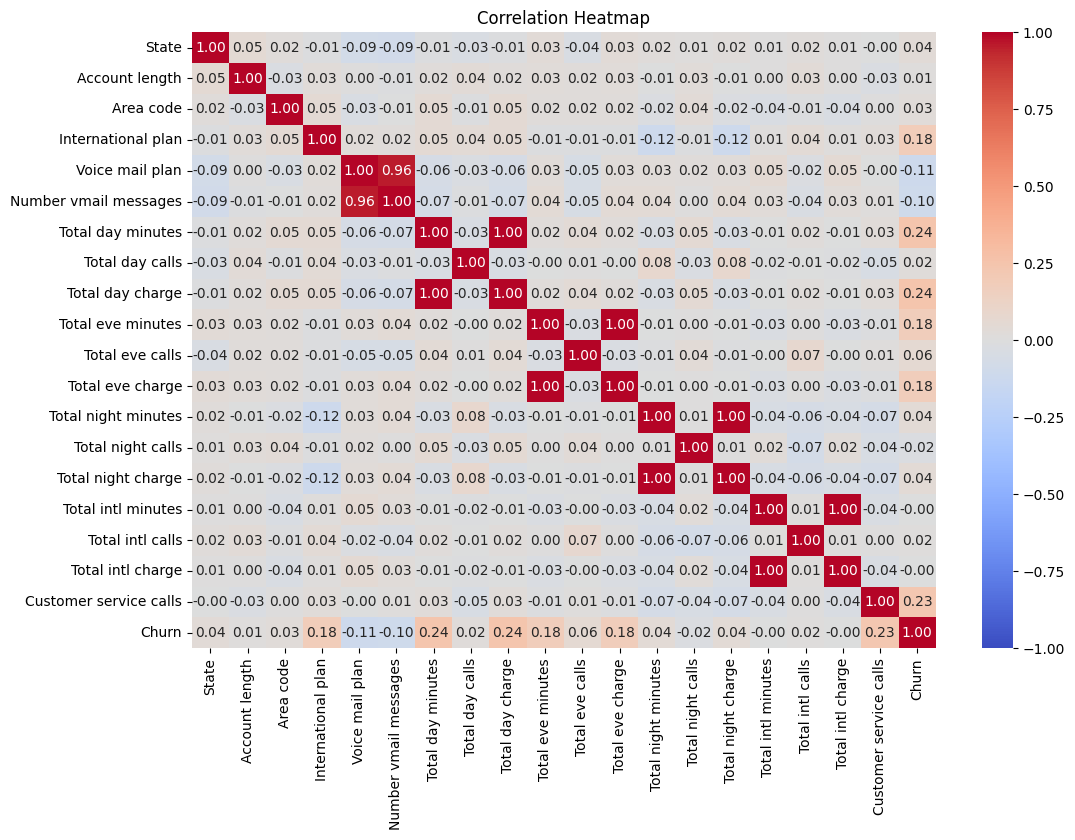

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data.corr()

# Visualize the correlations with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
###trainning featues
from sklearn.preprocessing import LabelEncoder

# Identifier les colonnes catégoriques (sans inclure 'Churn' si déjà dans ce type)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Initialiser un encodeur
label_encoder = LabelEncoder()

# Convertir chaque colonne catégorique
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Convertir la colonne 'Churn' en binaire (0 ou 1)
if data['Churn'].dtype == 'bool' or data['Churn'].nunique() == 2:
    data['Churn'] = data['Churn'].astype(int)
else:
    # Si Churn contient des valeurs textuelles comme "Yes"/"No"
    data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Afficher un aperçu du dataset après conversion
print(data.head())
print(data.dtypes)

   State  Account length  Area code  International plan  Voice mail plan  \
0     18             117        408                   0                0   
1     15              65        415                   0                0   
2     34             161        415                   0                0   
3     40             111        415                   0                0   
4     11              49        510                   0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1   

In [17]:
df = pd.DataFrame(data)
features = df.drop('Churn', axis=1)  # Données de caractéristiques
target = df['Churn']
print("Features (X):")
print(features.head())
print("\nTarget (y):")
print(target.head())

Features (X):
   State  Account length  Area code  International plan  Voice mail plan  \
0     18             117        408                   0                0   
1     15              65        415                   0                0   
2     34             161        415                   0                0   
3     40             111        415                   0                0   
4     11              49        510                   0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80            

In [18]:
from sklearn.feature_selection import SelectKBest, chi2


X = data.drop(columns=['Churn'])
y = data['Churn']  # La cible


chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)

# Obtenir les scores et p-values
scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

# Créer un DataFrame des résultats
results_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': scores,
    'p_value': p_values
})

# Filtrer les caractéristiques avec une p-value significative (< 0.05)
significant_features = results_df[results_df['p_value'] < 0.05]

# Afficher les résultats
print("Caractéristiques sélectionnées avec p-value < 0.05 :")
print(significant_features)


Caractéristiques sélectionnées avec p-value < 0.05 :
                   Feature  Chi2_Score        p_value
0                    State    7.867549   5.032984e-03
3       International plan   20.256472   6.772398e-06
4          Voice mail plan    6.153934   1.311201e-02
5    Number vmail messages  162.608106   3.046748e-37
6        Total day minutes  668.451912  2.169049e-147
8         Total day charge  113.630467   1.570034e-26
9        Total eve minutes  249.681345   3.047260e-56
10         Total eve calls    7.375270   6.612687e-03
11        Total eve charge   21.223652   4.086900e-06
12     Total night minutes   15.219960   9.568671e-05
18  Customer service calls   41.198923   1.374983e-10


In [19]:
#testing features

from sklearn.preprocessing import LabelEncoder

# Identifier les colonnes catégoriques (sans inclure 'Churn' si déjà dans ce type)
categorical_columns = data_testing.select_dtypes(include=['object', 'category']).columns

# Initialiser un encodeur
label_encoder = LabelEncoder()

# Convertir chaque colonne catégorique
for col in categorical_columns:
    data_testing[col] = label_encoder.fit_transform(data_testing[col])

# Convertir la colonne 'Churn' en binaire (0 ou 1)
if data_testing['Churn'].dtype == 'bool' or data_testing['Churn'].nunique() == 2:
    data_testing['Churn'] = data_testing['Churn'].astype(int)
else:
    # Si Churn contient des valeurs textuelles comme "Yes"/"No"
    data_testing['Churn'] = label_encoder.fit_transform(data_testing['Churn'])

# Afficher un aperçu du dataset après conversion
print(data_testing.head())
print(data_testing.dtypes)

   State  Account length  Area code  International plan  Voice mail plan  \
0     18             117        408                   0                0   
1     15              65        415                   0                0   
2     34             161        415                   0                0   
3     40             111        415                   0                0   
4     11              49        510                   0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1   

In [20]:
df_testing = pd.DataFrame(data_testing)
features_testing = df_testing.drop('Churn', axis=1)  # Données de caractéristiques
target_testing = df_testing['Churn']
print("Features (X):")
print(features_testing.head())
print("\nTarget (y):")
print(target_testing.head())

Features (X):
   State  Account length  Area code  International plan  Voice mail plan  \
0     18             117        408                   0                0   
1     15              65        415                   0                0   
2     34             161        415                   0                0   
3     40             111        415                   0                0   
4     11              49        510                   0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80            

OUTLIERS

State                       0
Account length              6
Area code                 161
International plan         53
Voice mail plan             0
Number vmail messages       1
Total day minutes           3
Total day calls             5
Total day charge            3
Total eve minutes           9
Total eve calls             8
Total eve charge            9
Total night minutes         9
Total night calls           3
Total night charge          9
Total intl minutes         10
Total intl calls           12
Total intl charge          10
Customer service calls     57
dtype: int64


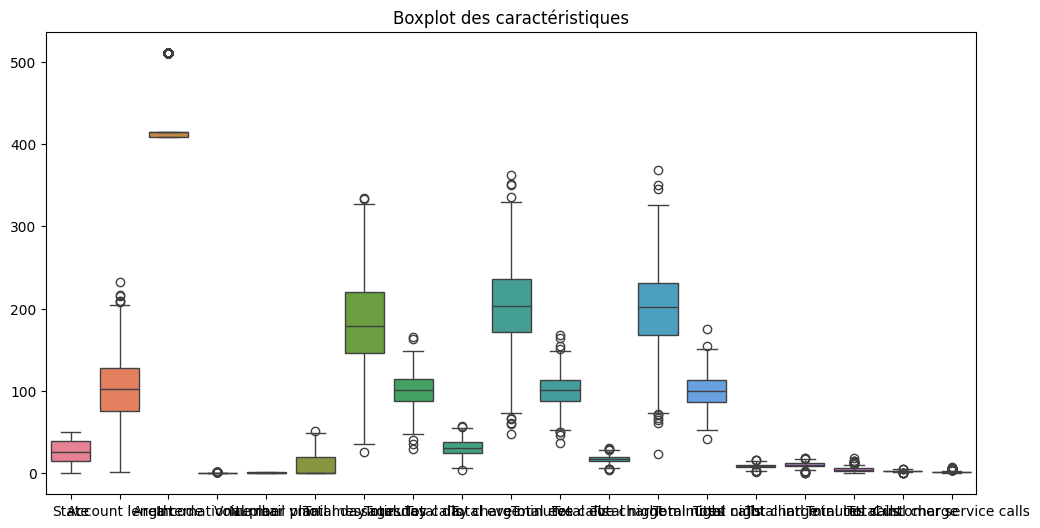

In [21]:
# Sélectionner uniquement les colonnes numériques
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Calculer les quartiles et l'IQR
Q1 = X_numeric.quantile(0.25)
Q3 = X_numeric.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes inférieure et supérieure pour chaque caractéristique
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = ((X_numeric < lower_bound) | (X_numeric > upper_bound)).sum()

# Afficher le nombre d'outliers par caractéristique
print(outliers)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.title("Boxplot des caractéristiques")
plt.show()


FEATURE VISUALISATION

<ipython-input-22-35f1f0c054a6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette="viridis")


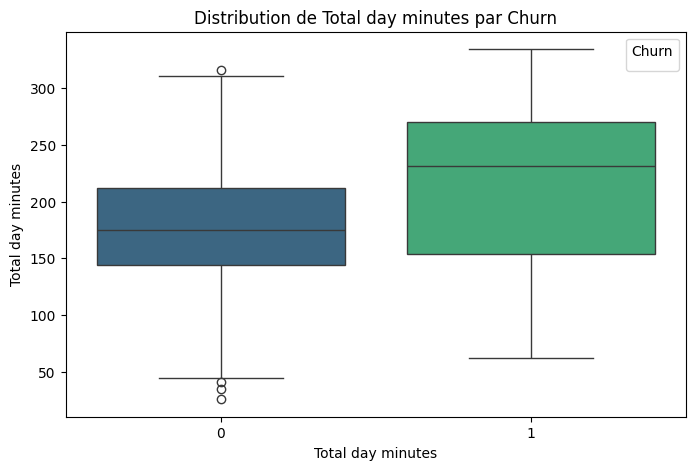

<ipython-input-22-35f1f0c054a6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette="viridis")


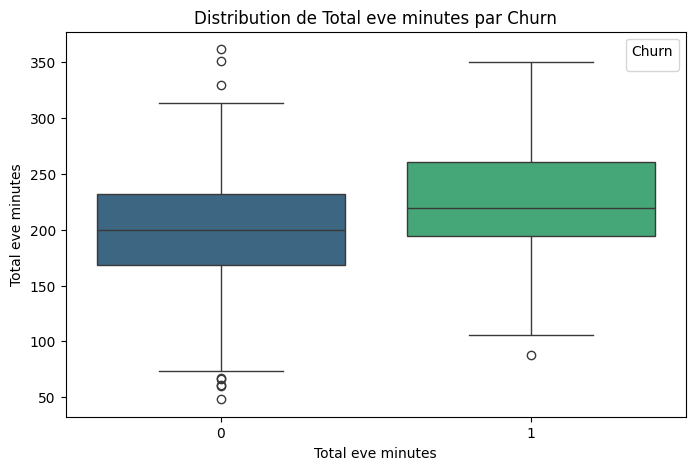

<ipython-input-22-35f1f0c054a6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette="viridis")


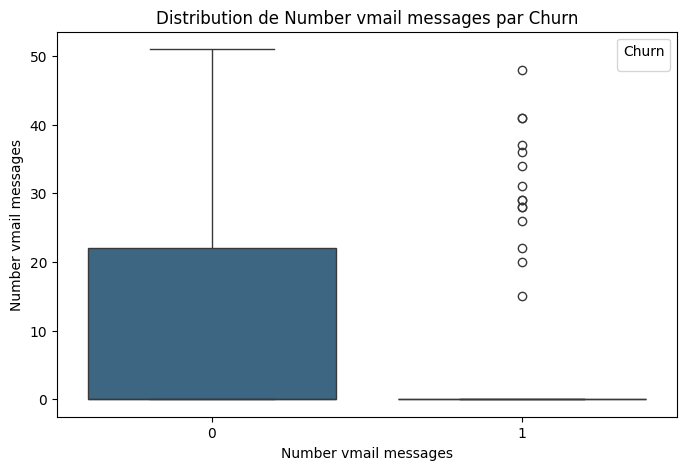

<ipython-input-22-35f1f0c054a6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette="viridis")


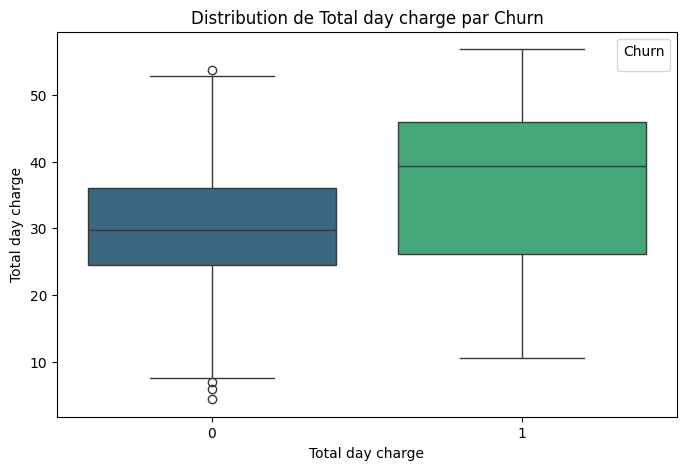

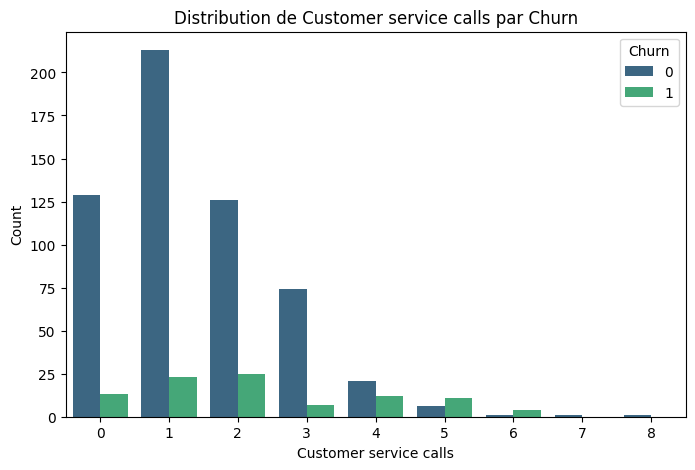

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trier par score Chi2 et sélectionner les 5 meilleures caractéristiques
best_features = results_df.sort_values(by='Chi2_Score', ascending=False).head(5)['Feature']

# Afficher les courbes pour ces 5 meilleures caractéristiques
for feature in best_features:
    plt.figure(figsize=(8, 5))

    # Vérifier si la caractéristique est catégorielle ou numérique pour choisir le bon type de graphique
    if data[feature].dtype == 'object' or data[feature].nunique() < 20:  # Si catégorielle
        sns.countplot(data=data, x=feature, hue='Churn', palette="viridis")
    else:  # Si numérique
        sns.boxplot(data=data, x='Churn', y=feature, palette="viridis")

    plt.title(f"Distribution de {feature} par Churn")
    plt.ylabel("Count" if data[feature].dtype == 'object' or data[feature].nunique() < 20 else feature)
    plt.xlabel(feature)
    plt.legend(title='Churn', loc="upper right")
    plt.show()


LINEAR REGRESSION

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Exemple de données fictives
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.010420222653186971


In [24]:
import pandas as pd

# Supposons que features soit un tableau numpy ou une liste, vous pouvez le convertir en DataFrame
X_train = pd.DataFrame(features  )# Remplacez 'features_train' par vos données
X_test = pd.DataFrame(features_testing)    # Remplacez 'features_test' par vos données

# Vérifiez que X_train est bien un DataFrame
print(type(X_train))  # Cela doit maintenant afficher <class 'pandas.core.frame.DataFrame'>
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Appliquer le LabelEncoder à chaque colonne catégorielle dans X_train et X_test
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# Vérifiez les types de colonnes après transformation
print(X_train.dtypes)


<class 'pandas.core.frame.DataFrame'>
State                       int64
Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
dtype: object


In [25]:
print(data.head())  # Aperçu des premières lignes
print(data_testing.head())


   State  Account length  Area code  International plan  Voice mail plan  \
0     18             117        408                   0                0   
1     15              65        415                   0                0   
2     34             161        415                   0                0   
3     40             111        415                   0                0   
4     11              49        510                   0                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1   

Decision Tree

In [26]:

common_rows = pd.merge(X_train, X_test, how='inner')
print(f"Nombre de lignes communes entre X_train et X_test : {len(common_rows)}")
common_rows.shape

Nombre de lignes communes entre X_train et X_test : 667


(667, 19)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

X_train shape: (80, 1)
y_train shape: (80,)
X_test shape: (20, 1)
y_test shape: (20,)
Mean Squared Error: 3.64


In [28]:
import numpy as np

# Vérifiez les classes dans y_train et y_test
print("Valeurs uniques dans y_train :", np.unique(y_train))
print("Valeurs uniques dans y_test :", np.unique(y_test))


Valeurs uniques dans y_train : [-109.4378073   -82.9872729   -81.83534115  -79.90568355  -72.06588651
  -61.75396116  -61.12293843  -59.58553622  -58.99326029  -50.05266618
  -46.16215583  -44.05770173  -42.22890999  -37.95939495  -34.89992314
  -33.88805311  -30.13564055  -29.34971484  -28.28791822  -27.0410512
  -25.20396014  -24.93079928  -23.47010643  -22.80066752  -21.62379263
  -20.94734406  -19.59823252  -19.45081759  -19.26324365  -15.81984182
  -13.59927355  -12.99357941  -12.5844933   -12.55807389   -9.9753657
   -9.78267718   -9.42488922   -9.04840811   -7.66486983   -5.80021775
   -4.76523173   -2.9323316    -1.45296967   -0.61273226    0.28445223
    2.89543125    3.4964533     3.91806313    4.03971049    4.70734503
    7.06163152    8.09491724    8.71911071   10.84543777   12.26778153
   13.09112657   13.66401013   13.82015105   13.88906421   14.44739156
   15.01996766   15.16204796   20.69384364   21.41062023   22.47970274
   25.51145466   27.08052587   32.17396589   34.

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialiser le modèle de régression
model = DecisionTreeRegressor(random_state=42, max_depth=5)

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"R-squared (R²) : {r2:.2f}")



Mean Squared Error (MSE) : 3.64
R-squared (R²) : 1.00


In [30]:
import pandas as pd

y_train_series = pd.Series(y_train)
print(y_train_series.head())  # Utiliser head() sur un pandas.Series


0    14.447392
1   -42.228910
2   -24.930799
3    63.556336
4    32.173966
dtype: float64


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the regressor
model = DecisionTreeRegressor(random_state=42, max_depth=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3.64
R² Score: 1.00


In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


X_train = data.iloc[:, :-1]
y_train = data.iloc[:, -1]

X_test = data_testing.iloc[:, :-1]
y_test = data_testing.iloc[:, -1]


model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100  # Accuracy en pourcentage
classification_rep = classification_report(y_test, y_pred, output_dict=True)
precision_macro = classification_rep["macro avg"]["precision"] * 100
f1_score_macro = classification_rep["macro avg"]["f1-score"] * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Précision moyenne (macro): {precision_macro:.2f}%")
print(f"F1-score moyen (macro): {f1_score_macro:.2f}%\n")
print("Rapport de classification détaillé:")
print(classification_report(y_test, y_pred))

Accuracy: 95.35%
Précision moyenne (macro): 97.43%
F1-score moyen (macro): 88.93%

Rapport de classification détaillé:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       572
           1       1.00      0.67      0.81        95

    accuracy                           0.95       667
   macro avg       0.97      0.84      0.89       667
weighted avg       0.96      0.95      0.95       667



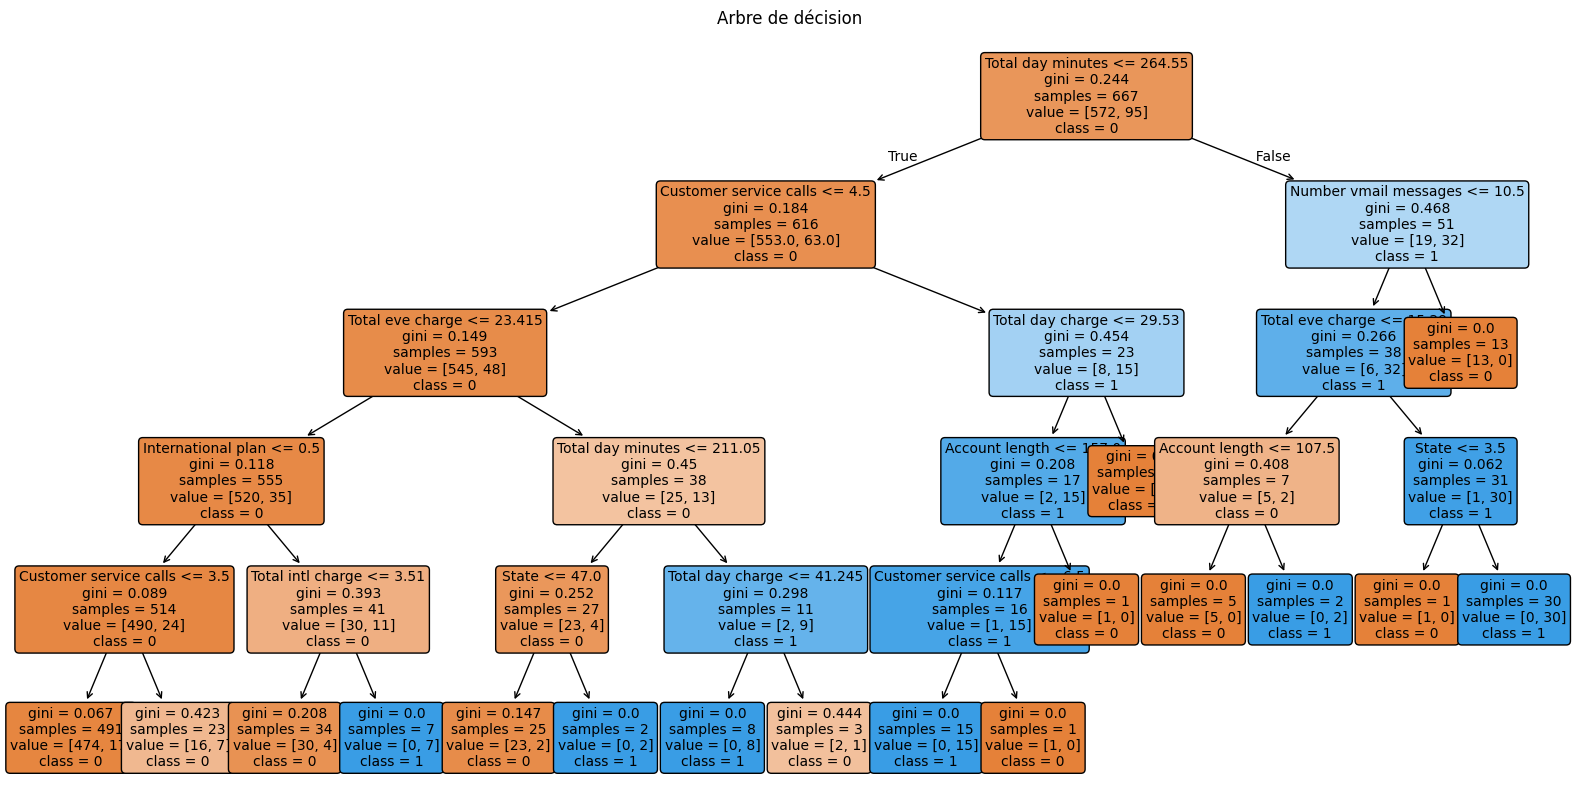

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in model.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Arbre de décision ")
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Appliquer KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Évaluer la précision et F1-score pour KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Affichage des résultats pour KNN
print(f"KNN - Précision : {accuracy_knn * 100:.2f}%")
print(f"KNN - F1-score : {f1_knn:.2f}")
print("Rapport de classification - KNN :")
print(classification_report(y_test, y_pred_knn))


KNN - Précision : 89.96%
KNN - F1-score : 0.51
Rapport de classification - KNN :
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       572
           1       0.83      0.37      0.51        95

    accuracy                           0.90       667
   macro avg       0.87      0.68      0.73       667
weighted avg       0.89      0.90      0.88       667



In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Appliquer SVM
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

# Évaluer la précision et F1-score pour SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Affichage des résultats pour SVM
print(f"SVM - Précision : {accuracy_svm * 100:.2f}%")
print(f"SVM - F1-score : {f1_svm:.2f}")
print("Rapport de classification - SVM :")
print(classification_report(y_test, y_pred_svm))


SVM - Précision : 85.76%
SVM - F1-score : 0.00
Rapport de classification - SVM :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RANDOM FOREST

In [36]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression

from sklearn.metrics import f1_score
model = LinearRegression()

# Entraînez le modèle
model.fit(X_train, y_train)

# Faites des prédictions
y_pred = model.predict(X_test)
model = RandomForestClassifier(random_state=42, max_depth=5)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)*100

# Afficher la précision
print(f"Accuracy: {accuracy:.2f}%")
from sklearn.metrics import classification_report
# Rapport de classification détaillé
print(classification_report(y_test, y_pred))


Accuracy: 93.70%
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       572
           1       1.00      0.56      0.72        95

    accuracy                           0.94       667
   macro avg       0.97      0.78      0.84       667
weighted avg       0.94      0.94      0.93       667



ADABOOSTING

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier

# Créez un modèle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
model = LinearRegression()

base_model = DecisionTreeClassifier(max_depth=1)  # Un arbre de décision de faible profondeur
model = AdaBoostClassifier(base_model, n_estimators=100, random_state=42)  # n_estimators ajustable
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred) * 100  # Convertir en pourcentage

# Afficher la précision
print(f"Accuracy: {accuracy:.2f}%")

# Rapport de classification détaillé
print("Rapport de classification détaillé:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 95.20%
Rapport de classification détaillé:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       572
           1       0.91      0.74      0.81        95

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



LOGISTIC REGRSSION

In [38]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Créer et entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=1000, random_state=42)  # max_iter peut être ajusté pour la convergence
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred) * 100  # Convertir en pourcentage

# Afficher la précision
print(f"Accuracy: {accuracy:.2f}%")

# Rapport de classification détaillé
print("Rapport de classification détaillé:")
print(classification_report(y_test, y_pred))

Accuracy: 86.81%
Rapport de classification détaillé:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       572
           1       0.59      0.24      0.34        95

    accuracy                           0.87       667
   macro avg       0.74      0.61      0.63       667
weighted avg       0.84      0.87      0.84       667



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)


y_pred = gbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}%")
print("Rapport de classification report:")
print( classification_rep)

Accuracy: 0.99%
Rapport de classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       572
           1       1.00      0.96      0.98        95

    accuracy                           0.99       667
   macro avg       1.00      0.98      0.99       667
weighted avg       0.99      0.99      0.99       667



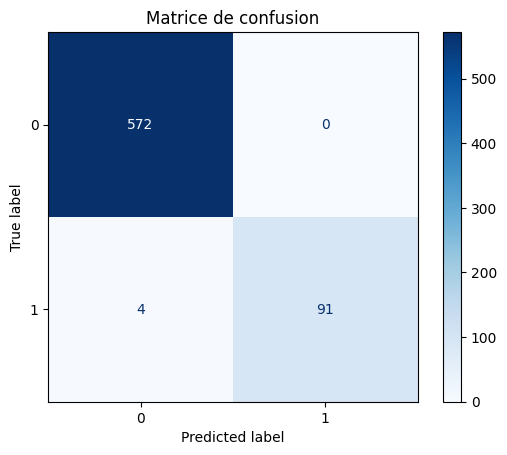

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Créer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme graphique
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()


F1-score: 0.98
ROC-AUC Score: 0.84


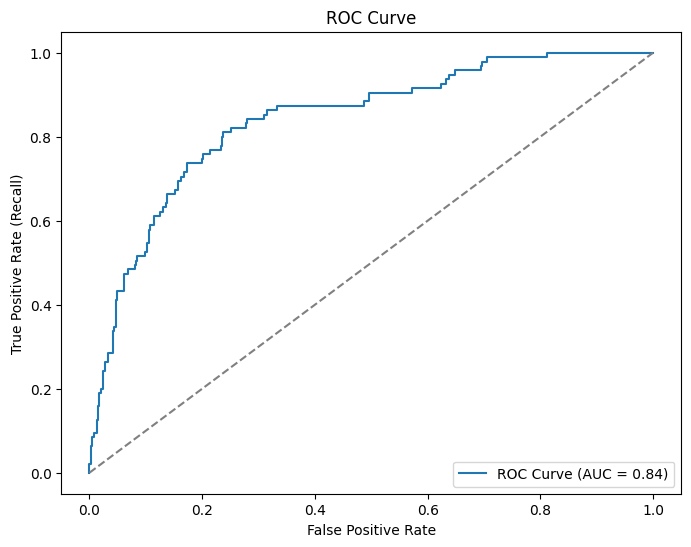


Cas mal classifiés :
     y_test  y_pred
14        1       0
282       1       0
458       1       0
542       1       0


In [41]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score

# Calculer le F1-score
f1 = f1_score(y_test, y_pred, average="binary")  # Adapte "binary" ou "weighted" selon ton problème
print(f"F1-score: {f1:.2f}")

# Calculer le ROC-AUC (si applicable pour classification binaire)
if len(model.classes_) == 2:
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score: {auc_score:.2f}")

    # Tracer la courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC-AUC et courbe ROC ne s'appliquent pas à la classification multi-classes.")

# Analyse des cas mal classifiés
print("\nCas mal classifiés :")
misclassified = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
misclassified = misclassified[misclassified["y_test"] != misclassified["y_pred"]]
print(misclassified.head())

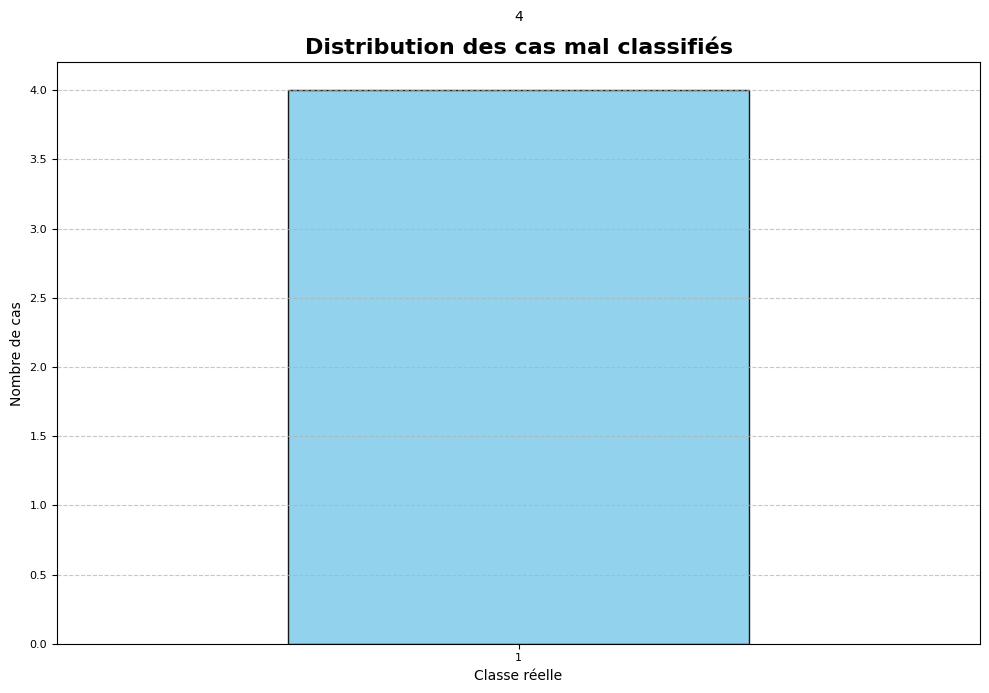

In [42]:
import matplotlib.pyplot as plt

# Configuration de la figure
plt.figure(figsize=(10, 7))

# Visualisation avec des couleurs personnalisées et des bordures
misclassified["y_test"].value_counts().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    alpha=0.9
)

# Ajouter un titre et des labels
plt.title("Distribution des cas mal classifiés", fontsize=16, fontweight='bold')
plt.xlabel("Classe réelle", fontsize=10)
plt.ylabel("Nombre de cas", fontsize=10)

# Ajouter les valeurs au-dessus des barres
for i, v in enumerate(misclassified["y_test"].value_counts()):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)

# Amélioration du style des axes
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()


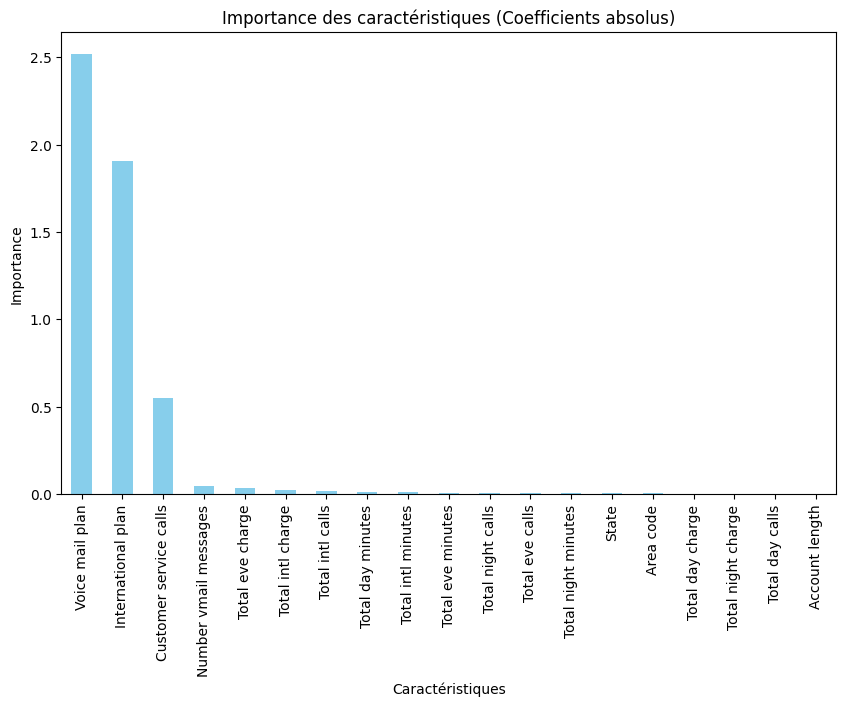

In [43]:
# Importance des caractéristiques
feature_importances = pd.Series(abs(model.coef_[0]), index=features.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Importance des caractéristiques (Coefficients absolus)")
plt.xlabel("Caractéristiques")
plt.ylabel("Importance")
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score

# Validation croisée avec 5 plis
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Scores de validation croisée :", scores)
print("Score moyen :", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Scores de validation croisée : [0.89552239 0.85820896 0.85714286 0.85714286 0.87218045]
Score moyen : 0.8680395017394232


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.svm import SVC

# Essayer un SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.8575712143928036
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


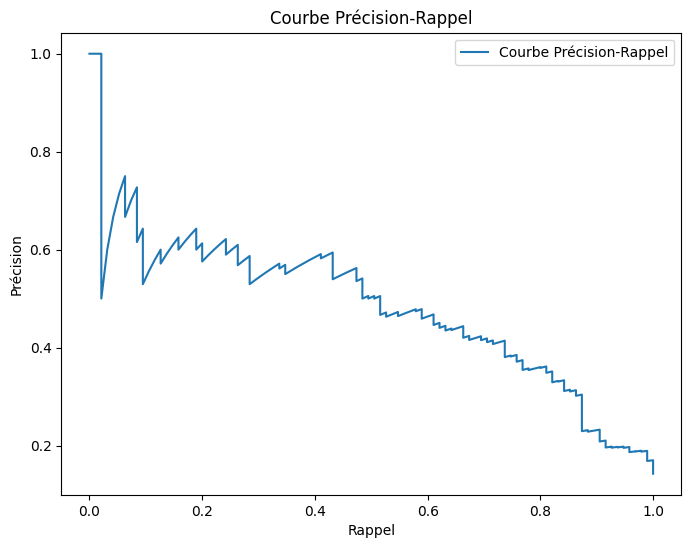

In [46]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Courbe Précision-Rappel (uniquement pour classification binaire)
if len(model.classes_) == 2:
    precision, recall, _ = precision_recall_curve(y_test, y_proba)  # y_proba : probabilités de prédiction
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label="Courbe Précision-Rappel")
    plt.xlabel("Rappel")
    plt.ylabel("Précision")
    plt.title("Courbe Précision-Rappel")
    plt.legend(loc="best")
    plt.show()

In [47]:
from sklearn.metrics import average_precision_score

ap = average_precision_score(y_test, y_proba)
print(f"Précision Moyenne (AP): {ap:.2f}")

Précision Moyenne (AP): 0.49


une précision moyenne (AP) de 0.86 est généralement considérée comme bonne. Cela indique que ton modèle a une capacité assez forte à distinguer les classes positives tout en maintenant un bon compromis entre précision et rappel.


In [48]:
# prompt: i want to see the best model that have the best accuracy

import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

# Assuming you have already trained various models (DecisionTreeClassifier, KNN, SVM, RandomForestClassifier, etc.)
# and stored their predictions in y_pred_dt, y_pred_knn, y_pred_svm, y_pred_rf, etc.

# Create a dictionary to store model names and their corresponding accuracy scores
model_accuracies = {}

# Evaluate and store the accuracy of each model
model_accuracies['Decision Tree'] = accuracy_score(y_test, y_pred) * 100  # Assuming y_pred from Decision Tree
model_accuracies['KNN'] = accuracy_score(y_test, y_pred_knn) * 100
model_accuracies['SVM'] = accuracy_score(y_test, y_pred_svm) * 100
model_accuracies['Random Forest'] = accuracy_score(y_test, y_pred) * 100 # Assuming y_pred from RandomForest


# Find the best model
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

print(f"Best Model: {best_model}")
print(f"Best Accuracy: {best_accuracy:.2f}%")


# Display the classification report for the best model.  You will need to adapt based on which y_pred variable corresponds to the best model
if best_model == 'Decision Tree':
    print(classification_report(y_test, y_pred))
elif best_model == 'KNN':
    print(classification_report(y_test, y_pred_knn))
elif best_model == 'SVM':
    print(classification_report(y_test, y_pred_svm))
elif best_model == 'Random Forest':
    print(classification_report(y_test, y_pred))

Best Model: Decision Tree
Best Accuracy: 99.40%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       572
           1       1.00      0.96      0.98        95

    accuracy                           0.99       667
   macro avg       1.00      0.98      0.99       667
weighted avg       0.99      0.99      0.99       667



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Performance Comparison:
              Model  Accuracy (%)  F1 Score (%)
  Gradient Boosting     99.400300     99.394896
      Decision Tree     95.352324     94.960558
      Random Forest     93.703148     92.921172
           AdaBoost     92.653673     92.220181
                KNN     89.955022     88.234398
Logistic Regression     86.806597     84.357612
                SVM     85.757121     79.181717

Best Model: Gradient Boosting
Best Accuracy: 99.40%
F1 Score: 99.39%


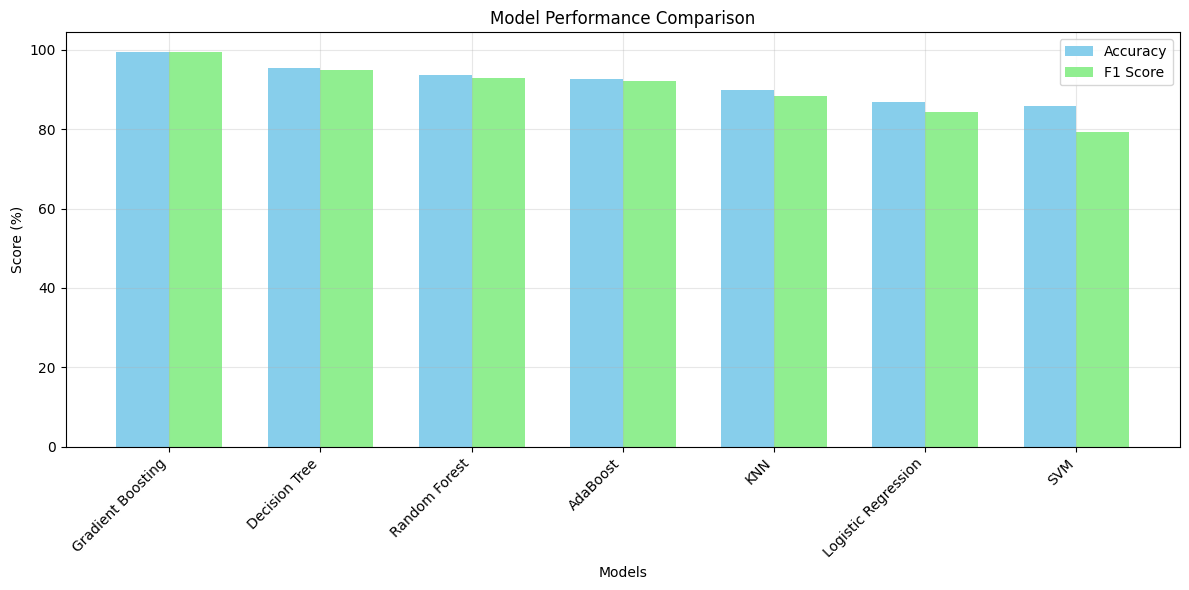

In [49]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt

# Prepare the data
X_train = data.drop(columns=['Churn'])
y_train = data['Churn']
X_test = data_testing.drop(columns=['Churn'])
y_test = data_testing['Churn']

# Train all models
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate metrics for each model
models_metrics = {
    'Decision Tree': {
        'accuracy': accuracy_score(y_test, y_pred_dt) * 100,
        'f1': f1_score(y_test, y_pred_dt, average='weighted') * 100
    },
    'Random Forest': {
        'accuracy': accuracy_score(y_test, y_pred_rf) * 100,
        'f1': f1_score(y_test, y_pred_rf, average='weighted') * 100
    },
    'KNN': {
        'accuracy': accuracy_score(y_test, y_pred_knn) * 100,
        'f1': f1_score(y_test, y_pred_knn, average='weighted') * 100
    },
    'SVM': {
        'accuracy': accuracy_score(y_test, y_pred_svm) * 100,
        'f1': f1_score(y_test, y_pred_svm, average='weighted') * 100
    },
    'AdaBoost': {
        'accuracy': accuracy_score(y_test, y_pred_ada) * 100,
        'f1': f1_score(y_test, y_pred_ada, average='weighted') * 100
    },
    'Gradient Boosting': {
        'accuracy': accuracy_score(y_test, y_pred_gb) * 100,
        'f1': f1_score(y_test, y_pred_gb, average='weighted') * 100
    },
    'Logistic Regression': {
        'accuracy': accuracy_score(y_test, y_pred_lr) * 100,
        'f1': f1_score(y_test, y_pred_lr, average='weighted') * 100
    }
}

# Convert to DataFrame for easy comparison
results_df = pd.DataFrame({
    'Model': list(models_metrics.keys()),
    'Accuracy (%)': [metrics['accuracy'] for metrics in models_metrics.values()],
    'F1 Score (%)': [metrics['f1'] for metrics in models_metrics.values()]
})

# Sort by accuracy in descending order
results_df = results_df.sort_values('Accuracy (%)', ascending=False)

# Display results
print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))

# Find the best model
best_model = results_df.iloc[0]
print(f"\nBest Model: {best_model['Model']}")
print(f"Best Accuracy: {best_model['Accuracy (%)']:.2f}%")
print(f"F1 Score: {best_model['F1 Score (%)']:.2f}%")

# Create bar plot comparing all models
plt.figure(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.35

plt.bar(x - width/2, results_df['Accuracy (%)'], width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, results_df['F1 Score (%)'], width, label='F1 Score', color='lightgreen')

plt.xlabel('Models')
plt.ylabel('Score (%)')
plt.title('Model Performance Comparison')
plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [50]:
import joblib
joblib.dump(model, 'decision_tree_model.joblib')


['decision_tree_model.joblib']

In [51]:
import joblib

# Save the model
joblib.dump(gb_model, 'gradient_boosting_model.joblib')
print("Model saved as 'gradient_boosting_model.joblib'")

# Example of how to load and use the saved model
# Load the model
loaded_model = joblib.load('gradient_boosting_model.joblib')

# Verify the loaded model works the same
test_predictions = loaded_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions) * 100

print("\nVerification of loaded model:")
print(f"Accuracy: {test_accuracy:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))

Model saved as 'gradient_boosting_model.joblib'

Verification of loaded model:
Accuracy: 99.40%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       572
           1       1.00      0.96      0.98        95

    accuracy                           0.99       667
   macro avg       1.00      0.98      0.99       667
weighted avg       0.99      0.99      0.99       667

